# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Observation 1:
Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere. This is because the Southern Hemisphere has significantly more ocean and much less land; water heats up and cools down more slowly than land.

Observation 2:
Highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops. This happens as equatorial region receives sunlight straight with less or no angle due to curvature shape of earth.

Observation 3:
Latitude doesn't have a strong iinfluence on wind speed. The speed of the wind is controlled by the strength of the air pressure gradient, the stronger the pressure gradient the higher the wind speed. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : saldanha
Processing Record 2 of Set 1 : itarema
Processing Record 3 of Set 1 : bitung
Processing Record 4 of Set 1 : laguna
Processing Record 5 of Set 1 : mataura
Processing Record 6 of Set 1 : shingu
Processing Record 7 of Set 1 : seoul
Processing Record 8 of Set 1 : luderitz
Processing Record 9 of Set 1 : punta arenas
Processing Record 10 of Set 1 : ribeira grande
Processing Record 11 of Set 1 : yellowknife
Processing Record 12 of Set 1 : nyurba
Processing Record 13 of Set 1 : chapleau
Processing Record 14 of Set 1 : atuona
Processing Record 15 of Set 1 : hilo
Processing Record 16 of Set 1 : nanortalik
Processing Record 17 of Set 1 : kailua
Processing Record 18 of Set 1 : mana
Processing Record 19 of Set 1 : sao miguel do araguaia
Processing Record 20 of Set 1 : myitkyina
Processing Record 21 of Set 1 : cape town
City not found. Skipping...
Processing Record 22 of Set 1 : dharchula
Processing Recor

Processing Record 33 of Set 4 : port lincoln
Processing Record 34 of Set 4 : alpena
Processing Record 35 of Set 4 : new norfolk
Processing Record 36 of Set 4 : parkes
Processing Record 37 of Set 4 : adrar
Processing Record 38 of Set 4 : katsina
Processing Record 39 of Set 4 : bilma
Processing Record 40 of Set 4 : severo-kurilsk
Processing Record 41 of Set 4 : longyearbyen
Processing Record 42 of Set 4 : erzincan
Processing Record 43 of Set 4 : esperance
Processing Record 44 of Set 4 : jaguarari
Processing Record 45 of Set 4 : uberaba
Processing Record 46 of Set 4 : key west
City not found. Skipping...
Processing Record 47 of Set 4 : mount gambier
Processing Record 48 of Set 4 : coahuayana
Processing Record 49 of Set 4 : shimoda
Processing Record 50 of Set 4 : otuzco
Processing Record 0 of Set 5 : changli
Processing Record 1 of Set 5 : denham springs
Processing Record 2 of Set 5 : pisco
City not found. Skipping...
Processing Record 3 of Set 5 : gat
Processing Record 4 of Set 5 : necoche

Processing Record 22 of Set 8 : hovd
Processing Record 23 of Set 8 : moerai
Processing Record 24 of Set 8 : balkanabat
Processing Record 25 of Set 8 : mandera
Processing Record 26 of Set 8 : cache creek
Processing Record 27 of Set 8 : kikwit
Processing Record 28 of Set 8 : alyangula
Processing Record 29 of Set 8 : kuala pilah
Processing Record 30 of Set 8 : qaqortoq
Processing Record 31 of Set 8 : novyy urengoy
Processing Record 32 of Set 8 : oranjestad
City not found. Skipping...
Processing Record 33 of Set 8 : weihe
Processing Record 34 of Set 8 : santiago de cuba
Processing Record 35 of Set 8 : vardo
Processing Record 36 of Set 8 : kieta
Processing Record 37 of Set 8 : rockland
City not found. Skipping...
Processing Record 38 of Set 8 : antofagasta
Processing Record 39 of Set 8 : miles city
Processing Record 40 of Set 8 : sfantu gheorghe
Processing Record 41 of Set 8 : faanui
Processing Record 42 of Set 8 : cockburn town
Processing Record 43 of Set 8 : sorland
Processing Record 44 o

Processing Record 5 of Set 12 : marawi
Processing Record 6 of Set 12 : mandalgovi
Processing Record 7 of Set 12 : manokwari
Processing Record 8 of Set 12 : manyana
Processing Record 9 of Set 12 : bay roberts
Processing Record 10 of Set 12 : benguela
Processing Record 11 of Set 12 : sikasso
Processing Record 12 of Set 12 : rodrigues alves
Processing Record 13 of Set 12 : ambon
Processing Record 14 of Set 12 : lipari
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})


In [6]:
# Count data
weather_dict.count()

City          575
Cloudiness    575
Country       575
Date          575
Humidity      575
Lat           575
Lng           575
Max Temp      575
Wind Speed    575
dtype: int64

In [7]:
# Display the Data Frame
weather_dict

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saldanha,0,ZA,1579902556,82,-33.01,17.94,66.20,5.82
1,Itarema,41,BR,1579902556,68,-2.92,-39.92,81.05,7.99
2,Bitung,20,ID,1579902556,94,1.45,125.18,73.40,0.63
3,Laguna,1,US,1579902556,82,38.42,-121.42,66.99,4.70
4,Mataura,98,NZ,1579902556,95,-46.19,168.86,59.00,10.00
...,...,...,...,...,...,...,...,...,...
570,Benguela,85,AO,1579902631,79,-12.58,13.41,78.35,4.14
571,Sikasso,72,ML,1579902631,10,10.92,-7.00,78.53,6.29
572,Rodrigues Alves,20,BR,1579902631,62,-7.74,-72.65,87.80,3.36
573,Ambon,20,ID,1579902632,88,-3.70,128.18,75.20,9.17


In [8]:
# Save city data into a csv file
weather_dict.to_csv("output_data/cities.csv", index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

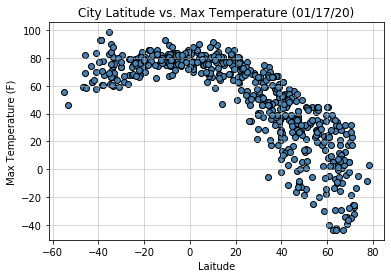

In [9]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

Highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops.

#### Latitude vs. Humidity Plot

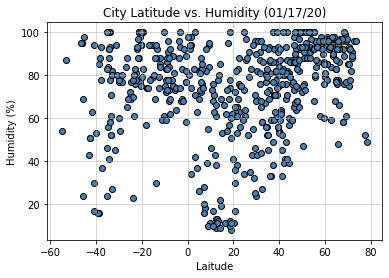

In [10]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

Polar regions have lower humidity and as latitude gets higher,humidity gets higher in southern hemisphere.

#### Latitude vs. Cloudiness Plot

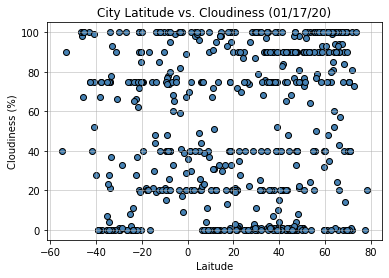

In [11]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

Cloudiness data is widely spread across the latitude.

#### Latitude vs. Wind Speed Plot

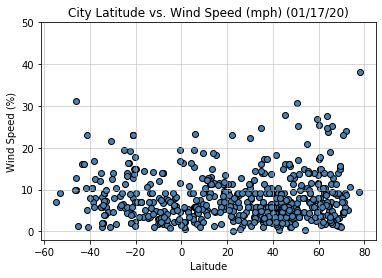

In [12]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

Wind speed data is widely spread across the latitude.

## Linear Regression

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [14]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.83


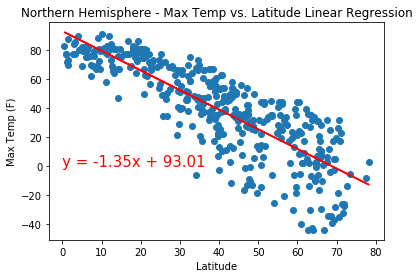

In [15]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a strong negative correlation between latitude and max temperature for northern hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.46


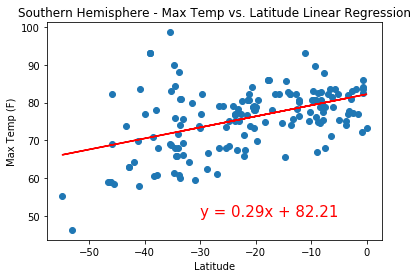

In [16]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

There is a moderate positive  correlation between latitude and max temperature for southern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.47


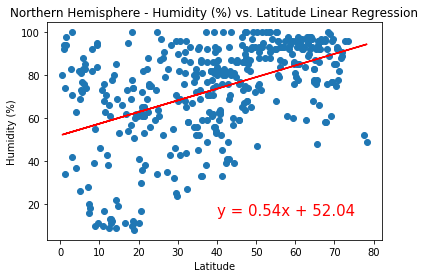

In [17]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 40, 15)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

There is a  moderate positive correlation between latitude and humidity for northern hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.29


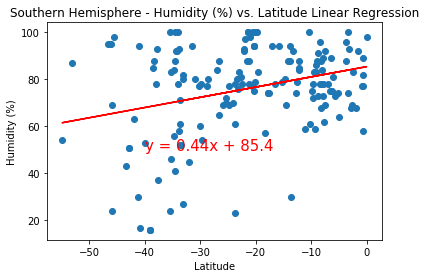

In [18]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")


There is a moderate positive correlation between latitude and humidity for southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.23


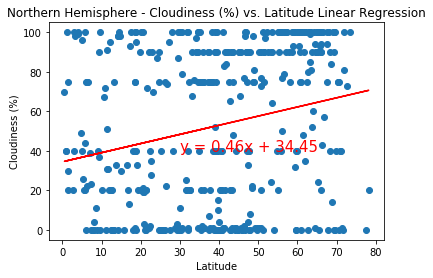

In [19]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a weak positive correlation between latitude and cloudiness for northern hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.08


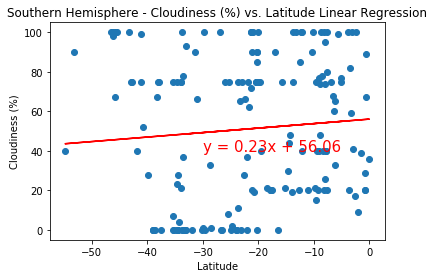

In [20]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

There is a weak positive correlation between latitude and cloudiness for southern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.1


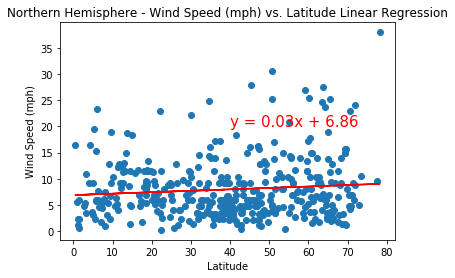

In [21]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, 40, 20)

# Set  title
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a weak positive correlation between latitude and windspeed for northern hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.24


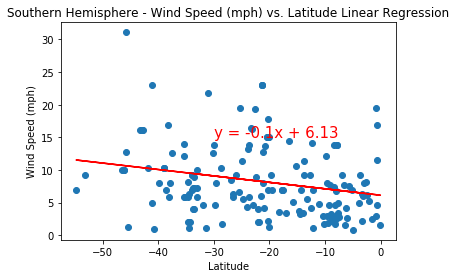

In [22]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

There is a weak negative correlation between latitude and wind speed for southern hemisphere. 